***Проект 3. Исследование объявлений о продаже квартир***

---

Предоставлен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Разобьем работу на несколько этапов.

   * откроем файл с данными и изучим общую информацию
   * произведем предобработку данных
   * посчитаем и добавим в таблицу новые данные
   * проведем исследовательский анализ
   * напишем общий вывод

### Откроем файл и изучим информацию

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


*Описание данных*
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*balcony — число балконов
*ceiling_height — высота потолков (м)
*cityCenters_nearest — расстояние до центра города (м)
*days_exposition — сколько дней было размещено объявление (от публикации до снятия)
*first_day_exposition — дата публикации
*floor — этаж
*floors_total — всего этажей в доме
*is_apartment — апартаменты (булев тип)
*kitchen_area — площадь кухни в квадратных метрах (м²)
*last_price — цена на момент снятия с публикации
*living_area — жилая площадь в квадратных метрах (м²)
*locality_name — название населённого пункта
*open_plan — свободная планировка (булев тип)
*parks_around3000 — число парков в радиусе 3 км
*parks_nearest — расстояние до ближайшего парка (м)
*ponds_around3000 — число водоёмов в радиусе 3 км
*ponds_nearest — расстояние до ближайшего водоёма (м)
*rooms — число комнат
*studio — квартира-студия (булев тип)
*total_area — площадь квартиры в квадратных метрах (м²)
*total_images — число фотографий квартиры в объявлении

### Предобработка данных

Создадим новый датафрейм который затем будем модифицировать.

In [4]:
data = df.copy()

Поменяем тип данных в столбце `last_price` на целочисленный.

In [5]:
data['last_price'] = data['last_price'].astype(int)

Заменим NaN из столбца `balcony`на 0, т.к. очевидно, что если значение пустое, то балкон отсутствует.  И поменяем тип данных на целочисленный.

In [6]:
data['balcony'] = data['balcony'].fillna(0).astype(int)

Посмотрим число уникальных значений столбца `is_appartment`.

In [7]:
print(data['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


Посмотрим число уникальных значений столбца `studio`.

In [8]:
print(data['studio'].value_counts())

False    23550
True       149
Name: studio, dtype: int64


Посмотрим число уникальных значений столбца `open_plan`

In [9]:
print(data['open_plan'].value_counts())

False    23632
True        67
Name: open_plan, dtype: int64


Так как этих значений не много, удалим эти строки и столбцы и будем рассмотривать данные только по квартирам.

In [10]:
#оставляем строки удовлетворяющие условию 
data = data.query('is_apartment != True')
data = data.query('studio != True')
data = data.query('open_plan != True')
#удаляем ненужные столбцы
data = data.drop(['is_apartment', 'studio', 'open_plan'],axis=1)

В столбце floors_total есть строки с пустыми значениями. Будет некорректно заменять их медийными значениями. Так как таких строк только 86 из 23699, то принимаем решение удалить эти строки. Затем поменяем тип данных на целочисленные.

In [11]:
data = data.dropna(subset=['floors_total'])

data['floors_total'] = data['floors_total'].astype(int)

Преобразуем дату в столбеце `first_day_exposition`. 

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%d")

В столбце `locality_name` заменим пустые значения на значение `Неизвестно`.

In [13]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

Переиндексируем таблицу после всех изменений.

In [14]:
data = data.reset_index()

Проверим что получилось.

In [15]:
display(data.head())

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23350 entries, 0 to 23349
Data columns (total 20 columns):
index                   23350 non-null int64
total_images            23350 non-null int64
last_price              23350 non-null int64
total_area              23350 non-null float64
first_day_exposition    23350 non-null datetime64[ns]
rooms                   23350 non-null int64
ceiling_height          14359 non-null float64
floors_total            23350 non-null int64
living_area             21500 non-null float64
floor                   23350 non-null int64
kitchen_area            21347 non-null float64
balcony                 23350 non-null int64
locality_name           23350 non-null object
airports_nearest        17912 non-null float64
cityCenters_nearest     17933 non-null float64
parks_around3000        17934 non-null float64
parks_nearest           7995 non-null float64
ponds_around3000        17934 non-null float64
ponds_nearest           8957 non-null float64
days_exp

In [17]:
data.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23350.000000,23350.000000,2.335000e+04,23350.000000,23350.000000,14359.000000,23350.000000,21500.000000,23350.000000,21347.000000,23350.000000,17912.000000,17933.000000,17934.000000,7995.000000,17934.000000,8957.000000,20204.000000
mean,11850.836403,9.891949,6.553723e+06,60.561877,2.088694,2.758734,10.627195,34.576486,5.856959,10.552383,0.587623,28805.336367,14189.305638,0.612747,490.859662,0.768596,518.166015,181.429964
std,6840.491905,5.682253,1.091630e+07,35.466147,1.065689,0.912546,6.569865,21.987119,4.854922,5.868453,0.957986,12620.724784,8625.990413,0.801824,341.546074,0.938637,278.016071,219.652359
min,0.000000,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,5926.250000,6.000000,3.450000e+06,40.200000,1.000000,2.510000,5.000000,18.700000,2.000000,7.000000,0.000000,18581.000000,9234.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,11862.500000,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26753.500000,13083.000000,0.000000,455.000000,0.000000,503.000000,96.000000
75%,17771.750000,14.000000,6.800000e+06,70.000000,3.000000,2.800000,16.000000,42.485000,8.000000,12.000000,1.000000,37250.000000,16280.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,23698.000000,50.000000,7.630000e+08,900.000000,19.000000,32.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Посчитаем и добавим в таблицу новые данные.

Добавим столбец цену квадратного метра `price_square_meter`.

In [18]:
#разделим цену на общую площать и округлим до целого присвоив целочисленный тип
data['price_square_meter'] = (data['last_price'] / data['total_area']).astype('int')

Добавим столбцы день недели, месяц и год публикации объявления.

In [19]:
#создадим столбец со днем недели, где 1 - это понедельник
data['weekday'] = data['first_day_exposition'].dt.weekday + 1

#создадим столбец с месяцем публикации
data['month'] = data['first_day_exposition'].dt.month

#создадим столбец с годом публикации
data['year'] = data['first_day_exposition'].dt.year

Добавим столбец с этажностью квартиры с категориями: первый, последний, другой.

In [20]:
data['floor_category'] = [0]*len(data)
for i in range(len(data)):
    if data.loc[i,'floor'] == 1:
        data.loc[i,'floor_category'] = 'первый'
    elif data.loc[i,'floor'] == data.loc[i,'floors_total']:
        data.loc[i,'floor_category'] = 'последний'
    else:
        data.loc[i,'floor_category'] = 'другой'

Добавим столбец с соотношением жилой и общей площади.

In [21]:
data['ratio_living_total'] = data['living_area'] / data['total_area']

Добавим столбец с соотношением площади кухни и общей площади.

In [22]:
data['ratio_kitchen_total'] = data['kitchen_area'] / data['total_area']

Создадим новый столбец расстояние до центра в километрах и округлим его.

In [23]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

Посмотрим, что получилось.

In [24]:
data.head(10)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_category,ratio_living_total,ratio_kitchen_total,cityCenters_nearest_km
0,0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,...,755.0,NaN,120370,4,3,2019,другой,0.472222,0.231481,16.0
1,1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,...,NaN,81.0,82920,2,12,2018,первый,0.460396,0.272277,19.0
2,2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,...,574.0,558.0,92785,4,8,2015,другой,0.612500,0.148214,14.0
3,3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,...,234.0,424.0,408176,5,7,2015,другой,NaN,NaN,7.0
4,4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,...,48.0,121.0,100000,2,6,2018,другой,0.320000,0.410000,8.0
5,5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,...,NaN,55.0,95065,1,9,2018,другой,0.473684,0.299342,NaN
6,6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,...,NaN,155.0,99195,4,11,2017,другой,0.284182,0.386059,19.0
7,7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,...,NaN,NaN,110544,4,4,2019,другой,NaN,0.263966,12.0
8,8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,...,NaN,189.0,87454,3,5,2018,другой,0.465320,0.265682,NaN
9,9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,...,NaN,289.0,88524,7,2,2017,другой,0.714754,0.106557,15.0


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23350 entries, 0 to 23349
Data columns (total 28 columns):
index                     23350 non-null int64
total_images              23350 non-null int64
last_price                23350 non-null int64
total_area                23350 non-null float64
first_day_exposition      23350 non-null datetime64[ns]
rooms                     23350 non-null int64
ceiling_height            14359 non-null float64
floors_total              23350 non-null int64
living_area               21500 non-null float64
floor                     23350 non-null int64
kitchen_area              21347 non-null float64
balcony                   23350 non-null int64
locality_name             23350 non-null object
airports_nearest          17912 non-null float64
cityCenters_nearest       17933 non-null float64
parks_around3000          17934 non-null float64
parks_nearest             7995 non-null float64
ponds_around3000          17934 non-null float64
ponds_nearest     

Поменяем тип данных у площадей с float64 на float32 для экономии памяти.

In [26]:
data = data.astype({'ratio_living_total' : np.float32, 
                    'ratio_kitchen_total' : np.float32})

### Проведем исследовательский анализ данных

**Изучим следующии параметры: площадь, цена, количество комнат, высота потолков. Построим гистограммы для каждого значения.**

Постром гистограмму для `total_area`

Text(0.5, 0, 'метр квадратный')

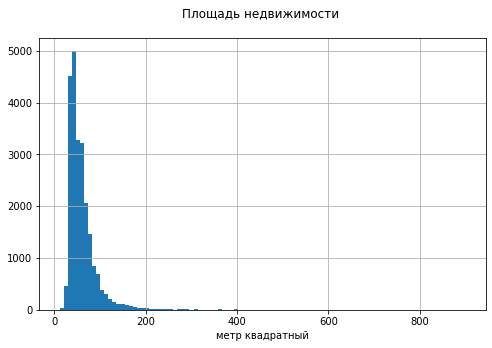

In [27]:
data['total_area'].hist(bins=100,figsize=(8,5))
plt.title('Площадь недвижимости \n')
plt.xlabel('метр квадратный')

Рассмотрим гистограмму подробнее сузив границы.

Text(0.5, 0, 'метр квадратный')

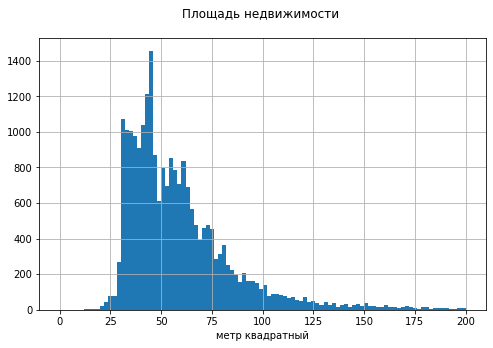

In [28]:
data['total_area'].hist(bins=100, range=(0,200),figsize=(8,5))
plt.title('Площадь недвижимости \n')
plt.xlabel('метр квадратный')

По гистограмме видно, что основная часть значений лежит в диаппазоне от 10 до 125. Преобладают квартиры от 30 до 48 метров.

Построим гистограмму для `last_price`.

Text(0.5, 0, 'рубли')

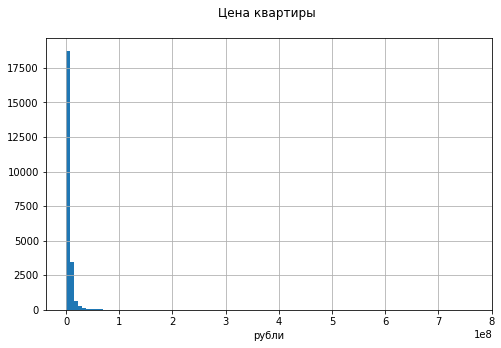

In [29]:
data['last_price'].hist(bins=100, figsize=(8,5))
plt.title('Цена квартиры \n')
plt.xlabel('рубли')

Рассмотрим гистограмму сузив границы.

Text(0.5, 0, 'рубли')

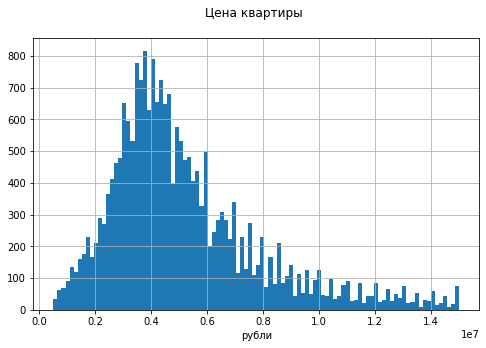

In [30]:
data['last_price'].hist(bins=100, range=(0.5*10**6,15*10**6),figsize=(8,5))
plt.title('Цена квартиры \n')
plt.xlabel('рубли')

По графику видно, что основная масса значений находится в диаппазоне от $1*10^6$ и $15*10^6$.

Всплески на правой части графика говорят о том, что цены за недвижимость назначают с шагом в 500000. Ближе к середине шаг цены становится меньше.

Text(0.5, 1.0, 'Количество комнат')

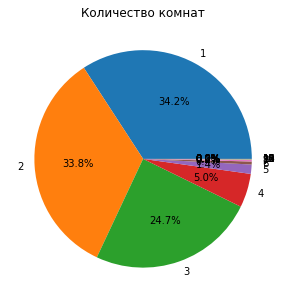

In [31]:
(data['rooms'].value_counts()
             .plot(kind="pie", label="", 
                    autopct='%1.1f%%', figsize=(5, 5)))
plt.title('Количество комнат')

В продаже в основном 1, 2-х и 3-х комнатные квартиры.

Построим гистограмму для `ceiling_height`.

Text(0.5, 0, 'Метры')

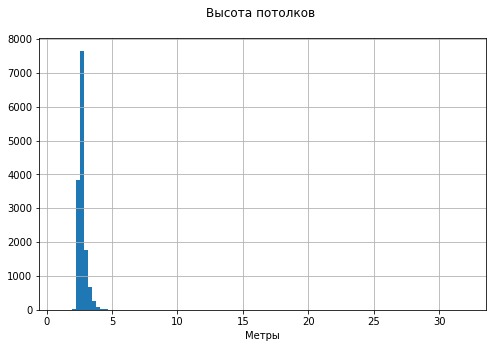

In [32]:
data['ceiling_height'].hist(bins=100, figsize=(8,5))
plt.title('Высота потолков \n')
plt.xlabel('Метры')

Сузим границы.

Text(0.5, 0, 'Метры')

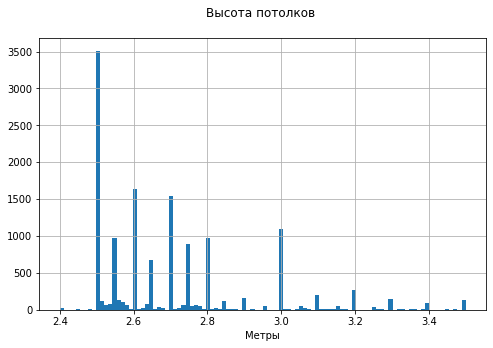

In [33]:
data['ceiling_height'].hist(bins=100, range=(2.4,3.5), figsize=(8,5))
plt.title('Высота потолков \n')
plt.xlabel('Метры')

Наиболее часто встречается высота потолков 2,5 метра.

**Изучим время продажи квартиры.**

Построим гистограмму.

Text(0.5, 0, 'Дни')

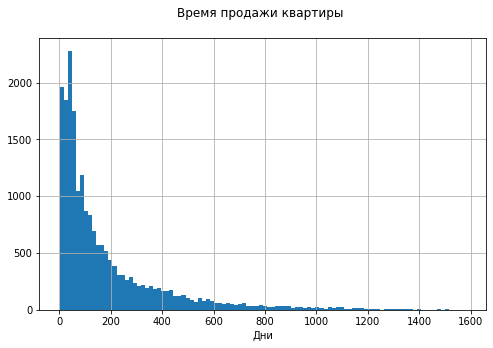

In [34]:
data['days_exposition'].hist(bins=100, figsize=(8,5))
plt.title('Время продажи квартиры \n')
plt.xlabel('Дни')

Найдем среднее и медиану.

In [35]:
print('Среднее равно:', data['days_exposition'].mean())
print('Медиана равна:', data['days_exposition'].median())

Среднее равно: 181.4299643634924
Медиана равна: 96.0


Построим диаграмму размаха.

Text(0.5, 0, 'Дни')

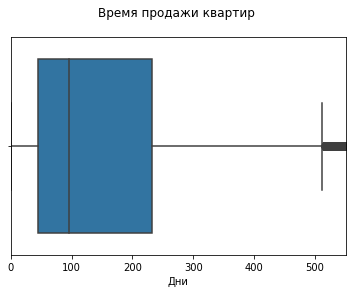

In [36]:
sb.boxplot(x=data['days_exposition'], orient="h")
plt.xlim(0, 550)
plt.title('Время продажи квартир \n')
plt.xlabel('Дни')

Анализируя полученные данные приходим к выводу, что среднее время продажи недвижимости 181 день. Обычно продажа занимает 95 дней. Продажу более 500 дней можно считать очень долгой.

**Уберем редкие и выбивающиеся значения из таблицы**

In [37]:
#создадим новую таблицу, которую будем модифицировать.
data_new = data.copy()

In [38]:
#Применяем фильтр к столбцу total_area
data_new = data[(data_new['total_area'] >= 20) & (data_new['total_area'] <=125)]

In [39]:
#Применим фильтр к столбцу last_price
data_new = data_new[(data_new['last_price'] >= 500000) & (data_new['last_price'] <= 15000000)]

In [40]:
#Применим фильтр к столбцу rooms
data_new = data_new[data_new['rooms'] < 5]

In [41]:
#Применим фильтр к столбцу ceiling_height
data_new = data_new[(data_new['ceiling_height'] >= 2.5) & (data_new['ceiling_height'] <=3)]

In [42]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12237 entries, 0 to 23349
Data columns (total 28 columns):
index                     12237 non-null int64
total_images              12237 non-null int64
last_price                12237 non-null int64
total_area                12237 non-null float64
first_day_exposition      12237 non-null datetime64[ns]
rooms                     12237 non-null int64
ceiling_height            12237 non-null float64
floors_total              12237 non-null int64
living_area               11590 non-null float64
floor                     12237 non-null int64
kitchen_area              11548 non-null float64
balcony                   12237 non-null int64
locality_name             12237 non-null object
airports_nearest          9440 non-null float64
cityCenters_nearest       9452 non-null float64
parks_around3000          9453 non-null float64
parks_nearest             3846 non-null float64
ponds_around3000          9453 non-null float64
ponds_nearest         

**Изучим какие факторы больше всего влияют на стоимость квартиры.**

Изучим, зависит ли цена от площади, числа комнат и удаленности от центра.

Посчитаем коэффициеты корреляции между ценой, общей площадью, количеством комнат и удаленностью от центра.

In [43]:
#создадим новую таблицу с интерессующими нас данными и посчитаем коэффициент корреляции
data_new_corr = data_new[['last_price', 
                          'total_area', 
                          'rooms', 
                          'cityCenters_nearest']]
data_new_corr.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.723851,0.434465,-0.300626
total_area,0.723851,1.000000,0.790845,-0.098883
rooms,0.434465,0.790845,1.000000,-0.048129
cityCenters_nearest,-0.300626,-0.098883,-0.048129,1.000000


Самый высокий коэффициент корреляции (КК) 0,8 в данной таблице между общей площадью и количеством комнат, что вполне естественно. Чем больше площадь комнаты, тем больше площадь квартиры. Нас же интересует КК между ценой и общей площадью. Он тоже довольно высок 0,72. Т.к. площадь является основным параметром определяющий цену квартиры. Зависимость цены от количества комнат выражена слабо, это второстепенная составляющая цены квартиры. Зависимость между ценой и расстоянием от центра очень маленькая и имеет отрицательное значение. 

Построим матрицу рассеяния.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff97587de10>,
      dtype=object)

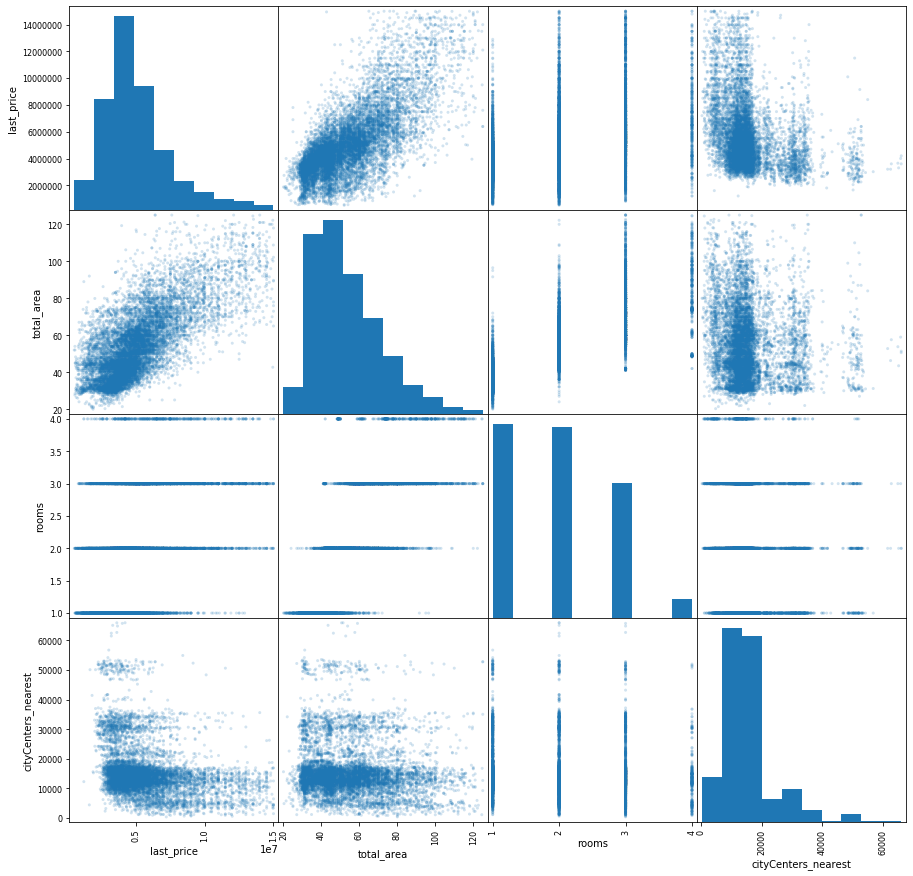

In [44]:
pd.plotting.scatter_matrix(data_new_corr, figsize=(15, 15), alpha=0.2)

На гистограмме цены мы видим, что основном преобладают цены в 5 млн. рублей. 

Связь цены и площади: видна зависимость. Диаграмма рассеяния идет широким пятном в сторону увеличения и на значениях площати более 70 кв.метров и цене больше 8 млн. рублей рассыпается.

Связь цены и количества комнат трудно разглядеть на этой диаграмме. Разберем ее отдельно.

Связь цены и расстоянием от центра. Зависимость прослеживается слабо (КК = -0,3).

*Исследуем зависимость цены от того, на каком этаже расположена квартира.*

    Построим график и проанализируем.

Text(0, 0.5, 'Стоимость')

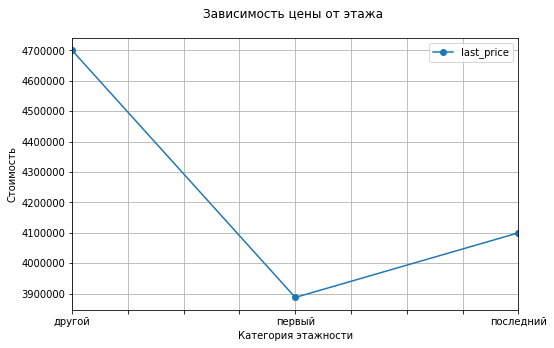

In [45]:
(data_new.pivot_table(index='floor_category', values='last_price',aggfunc='median')
         .plot(figsize=(8,5),grid=True, style='o-'))
plt.title('Зависимость цены от этажа \n')
plt.xlabel('Категория этажности')
plt.ylabel('Стоимость')

Судя по графику цена квартиры зависит от этажа расположения квартиры. Цена квартиры на первом этаже меньше цены на последнем на 200000 рублей (5%) и на 800000 рублей (20%) меньше цены на остальных этажах.

*Изучим зависимость от даты размещения: дня недели, месяца и года.*

    Изучим влияние цены от дня недели.

Text(0, 0.5, 'Стоимость')

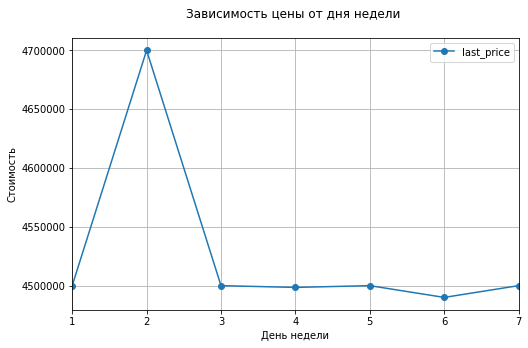

In [46]:
(data_new.pivot_table(index='weekday', values='last_price',aggfunc='median')
         .plot(figsize=(8,5),grid=True, style='o-'))
plt.title('Зависимость цены от дня недели \n')
plt.xlabel('День недели')
plt.ylabel('Стоимость')

        Интересная закономерность. Цена во вторник выше на 7%, чем в остальные дни.

    Рассмотрим влияние цены от месяца размещения объявления.

Text(0, 0.5, 'Стоимость')

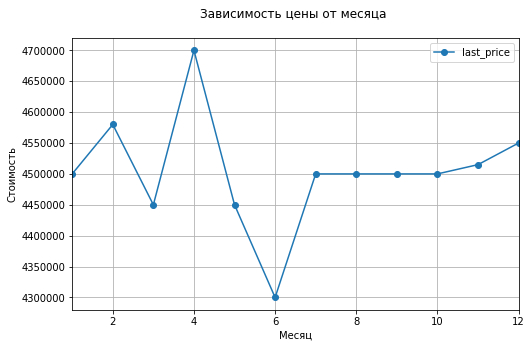

In [47]:
(data_new.pivot_table(index='month', values='last_price',aggfunc='median')
         .plot(figsize=(8,5),grid=True, style='o-'))
plt.title('Зависимость цены от месяца \n')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')

    В первой половине года цена волатильна. Колебания цены составляет 400000 рублей или 9%. Затем цена стабилизируется. 

    Посмотрим на зависимость цены от года подачи объявления.

Text(0, 0.5, 'Стоимость')

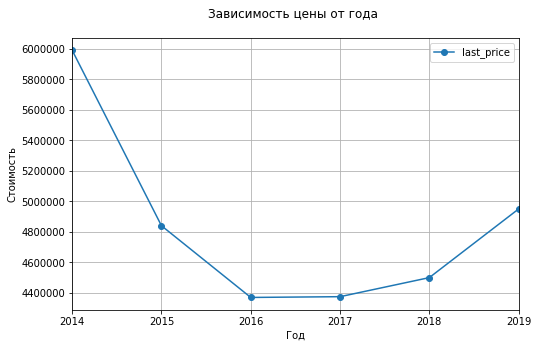

In [48]:
(data_new.pivot_table(index='year', values='last_price',aggfunc='median')
         .plot(figsize=(8,5),grid=True, style='o-'))
plt.title('Зависимость цены от года \n')
plt.xlabel('Год')
plt.ylabel('Стоимость')

        На графике виден значительный спад от 2014 к 2016 году на 26% (отголосок кризиса 2014 года), затишье в 2017 и плавный подъем цены в 2018 с небольшим ускорением в 2019 году. Отскок составил около 12%. 

**Выберем 10 населенных пунктов с наибольшим числом объявлений.**

Посчитаем среднюю цену квадратного метра в этих населенных пунктах.

In [49]:
#создадим новую таблицу сгруппировав по населенным пунктам и посчитав среднее.
towns = (
    data_new
    .groupby('locality_name')
    .agg({'locality_name': 'count', 'price_square_meter': 'mean'})
    .rename(columns={'locality_name': 'total', 
                     'price_square_meter': 'mean_price_square_meter'})
)
towns['mean_price_square_meter'] = towns['mean_price_square_meter'].astype(int)
display(towns.sort_values(by='total', ascending=False).head(10))

,total,mean_price_square_meter
locality_name,,
Санкт-Петербург,8101,107198
Всеволожск,261,67239
посёлок Шушары,213,79249
Пушкин,200,100383
посёлок Мурино,194,87558
Колпино,188,76026
Гатчина,142,69947
посёлок Парголово,136,90977
Петергоф,135,83647


Text(0, 0.5, 'Цена за кв. метр')

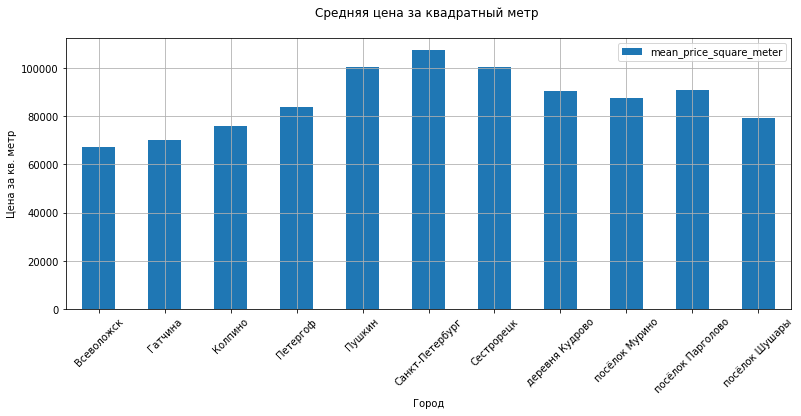

In [50]:
towns.query('total >= 117').plot(kind='bar', y='mean_price_square_meter', grid=True, figsize=(13,5), style='o-')
plt.xticks(rotation=45)
plt.title('Средняя цена за квадратный метр \n')
plt.xlabel('Город')
plt.ylabel('Цена за кв. метр')

    Из графика видно, что самая высокая стоимость жилья в Санкт-Петербурге, чуть ниже Пушкин и Сестрорецк, а самая низкая в Всеволжске и Гатчине.

**Изучим предложения квартир. Выясним, какая область входит в центр Санкт-Петербурга.**

In [51]:
#создадим новую таблицу включающую недвижимость только Санкт-Петербурга
city_SP = data_new[data_new['locality_name'] == "Санкт-Петербург"]

Text(0, 0.5, 'Стоимость')

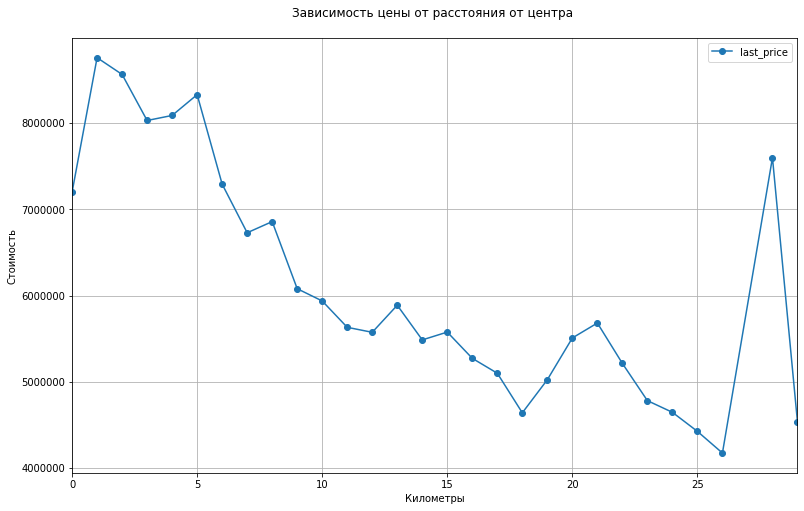

In [53]:
#построим график
(city_SP.pivot_table(index='cityCenters_nearest_km',values='last_price', aggfunc='mean')
        .plot(grid=True, figsize=(13,8), style='o-'))
plt.title('Зависимость цены от расстояния от центра \n')
plt.xlabel('Километры')
plt.ylabel('Стоимость')

    Смотря на график можно выделить пик на 5 км. После которых цена идет резко вниз.Это и есть граница центральной зоны.

**Выделим сегмент квартир в центре.**

Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат и высоту потолков.

In [54]:
#Сформируем новую таблицу с квартирами в центральной зоне
city_SP_centre = city_SP[city_SP['cityCenters_nearest'] <= 5000].reset_index()

    Изучим площадь квартир построив гистограмму.

Text(0.5, 0, 'метры квадратные')

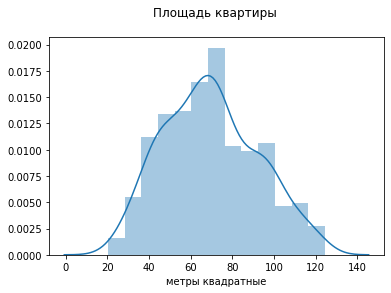

In [55]:
sb.distplot(city_SP_centre['total_area'])
plt.title('Площадь квартиры \n')
plt.xlabel('метры квадратные')

    Больше всего квартир в диапазоне от 40 до 100 кв. метров.

    Изучим цену построив гистограмму.

Медианное значение цены: 7765000.0
Средняя цена: 8239722


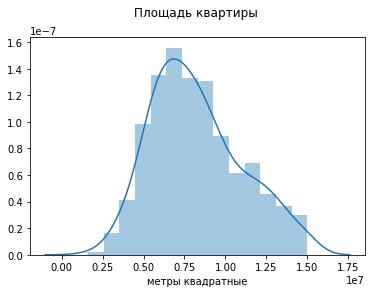

In [56]:
sb.distplot(city_SP_centre['last_price'])
plt.title('Площадь квартиры \n')
plt.xlabel('метры квадратные')
print('Медианное значение цены:', city_SP_centre['last_price'].median())
print('Средняя цена:', round(city_SP_centre['last_price'].mean()))

    Больше всего квартир с ценой от 5 до 10 млн. рублей.

    Исследуем число комнат построив круговую диаграмму.

Text(0.5, 1.0, 'Количество комнат')

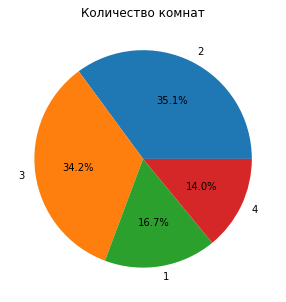

In [57]:
(city_SP_centre['rooms'].value_counts()
                         .plot(kind="pie", label="", 
                            autopct='%1.1f%%', figsize=(5, 5)))
plt.title('Количество комнат')

    В основном в продаже 2-х и 3-х комнатные квартиры.

    Исследуем высоту потолков.

Text(0.5, 0, 'метры')

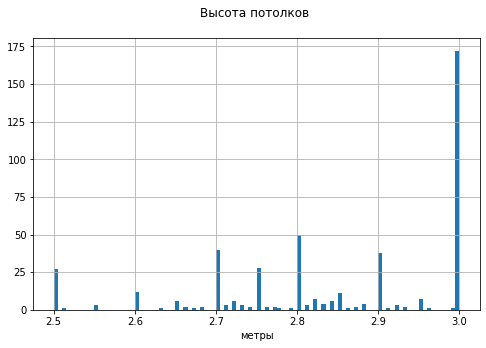

In [58]:
city_SP_centre['ceiling_height'].hist(bins=100, figsize=(8,5))
plt.title('Высота потолков \n')
plt.xlabel('метры')

    В центре города преобладает высота потолков в 3 метра.

Исследуем факторы которые влияют на стоимость квартиры (число комнат, этаж, удаленность от центра, дата размещения объявления). Сравним с выводами по всей базе.

In [59]:
city_SP_centre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 29 columns):
level_0                   456 non-null int64
index                     456 non-null int64
total_images              456 non-null int64
last_price                456 non-null int64
total_area                456 non-null float64
first_day_exposition      456 non-null datetime64[ns]
rooms                     456 non-null int64
ceiling_height            456 non-null float64
floors_total              456 non-null int64
living_area               435 non-null float64
floor                     456 non-null int64
kitchen_area              431 non-null float64
balcony                   456 non-null int64
locality_name             456 non-null object
airports_nearest          456 non-null float64
cityCenters_nearest       456 non-null float64
parks_around3000          456 non-null float64
parks_nearest             285 non-null float64
ponds_around3000          456 non-null float64
ponds_neares

In [60]:
#создадим новую таблицу с интерессующими нас данными и посчитаем коэффициент корреляции
city_SP_centre_corr = city_SP_centre[['last_price', 
                                      'total_area', 
                                      'rooms', 
                                      'cityCenters_nearest']]
city_SP_centre_corr.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.643170,0.378824,-0.031632
total_area,0.643170,1.000000,0.767534,-0.105315
rooms,0.378824,0.767534,1.000000,-0.135698
cityCenters_nearest,-0.031632,-0.105315,-0.135698,1.000000


Коэффициент корреляции (КК) между ценой и площадью в центре Санкт-Петербурга чуть меньше (0,64 против 0,72), так же ниже зависимость между ценой и количеством комнат (0,44 и 0,38). Влияние расстояния на цену квартиры почти нулевое.

Прстроим матрицу рассеяния.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9740ac3d0>,
      dtype=object)

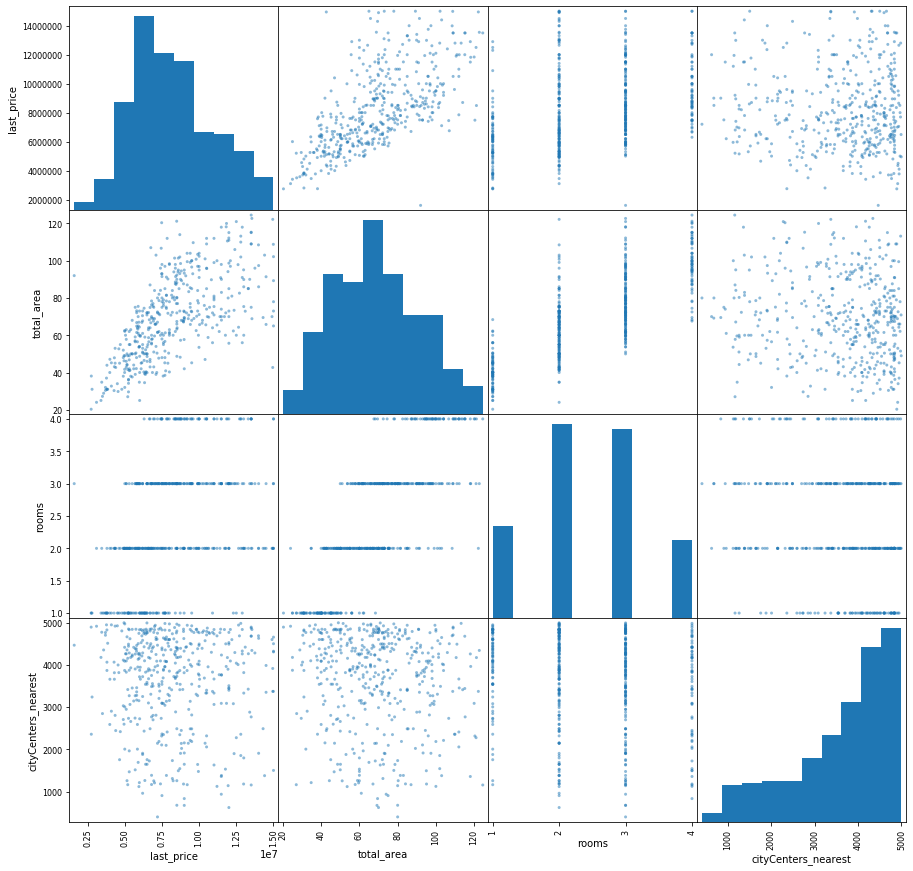

In [61]:
pd.plotting.scatter_matrix(city_SP_centre_corr, figsize=(15, 15))

На гистограмме цены мы видем, что основном преобладают цены в районе 7 млн. рублей.

Связь цены и площади: видна зависимость. Диаграмма рассеяния расширяется кверху и постепенно рассеивается. Границы расширения четко выражены и сразу видны выпадающие значения.

Связь цены и количества комнат трудно разглядеть на этой диаграмме. Разберем ее отдельно.

Связь цены и расстоянием от центра. Зависимость не прослеживается. Видно как значения сгруппировались у правой границы. Это говорит о том, что большинство предложений находится у границы центра города. Гистограмма зависимости расстояния от центра подтверждает это.

    Рассмотрим зависимость между ценой и числом комнат от расположения квартиры: "в центре" и "не в центре".

In [62]:
#для построения красивого графика ;-) создадим новую таблицу
rooms_SP_and_all = data_new[['last_price', 'rooms', 'locality_name', 'cityCenters_nearest']].copy()
rooms_SP_and_all = rooms_SP_and_all.reset_index(drop=True)

In [63]:
#отсортируем расстояние от центра на "в центре" и "не в центре"
for i in range(len(rooms_SP_and_all)):
    if rooms_SP_and_all.loc[i,'cityCenters_nearest'] <= 5000:
        rooms_SP_and_all.loc[i,'locality_name'] = 'центр'
    else:
        rooms_SP_and_all.loc[i,'locality_name'] = 'не центр'

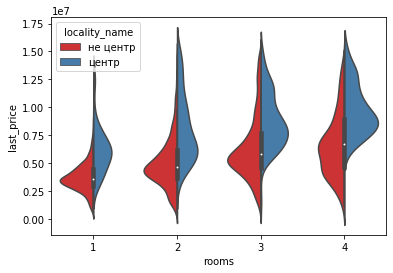

In [64]:
#построим график
sb.violinplot(x='rooms', y='last_price', data=rooms_SP_and_all, hue='locality_name', split=True, palette='Set1');

На графике видна зависимость между ценой и количеством комнат как для крартир "в центре", так и "не в центре". Причем четко видно, что график распределения (ГР) "в центре" находится чуть выше по сравнению с остальной базой. Основная масса предложений "не в центре" для 1 комнатных квартир в диапазоне около 3 млн. рублей, 2-х комнатных - 4,5 млн., 3-х комнатных 5,5 млн, 4-х комнатных - 7 млн., причем ГР более пологий. Для квартир "в центре" основная масса предложений для 1 комнатных квартир в диапазоне около 6 млн. рублей, 2-х комнатных - 6 млн., но более размыта в сторону увеличения, 3-х комнатных - 7,5 млн, 4-х комнатных - 8 млн. Есть интересная особенность, если "не в центре" ГР имеен тенденцию  становится ниже и шире при увеличении количества комнат, то "в центре" мы наблюдаем обратную картину, чем больше комнат, тем ГР становится выше. 

    Рассмотрим зависимость между ценой и этажностью.

Text(0, 0.5, 'Цена')

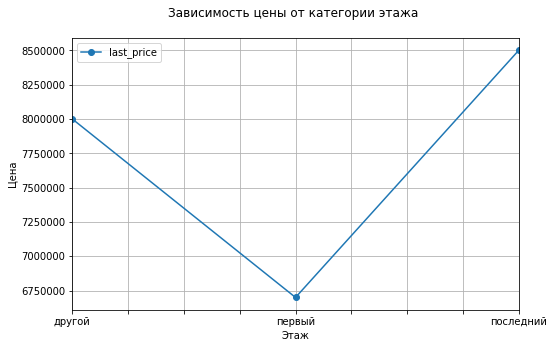

In [65]:
(city_SP_centre.pivot_table(index='floor_category', values='last_price', aggfunc='median')
                           .plot(figsize=(8,5), grid=True,style='o-'))
plt.title('Зависимость цены от категории этажа \n')
plt.xlabel('Этаж')
plt.ylabel('Цена')

Удивительно, но цена за квартиры на последнем этаже увеличилась, обогнав цену за другие этажи. Разница цены между первым и последнем этажом составила 1,7 млн. рублей или 25%.

    Рассмотрим зависимость между ценой и удаленностью от центра.

Text(0, 0.5, 'Цена')

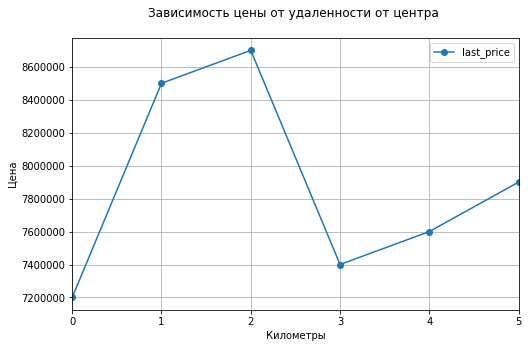

In [66]:
#city_SP_centre.plot(x='cityCenters_nearest', y='last_price', style='o', figsize=(8,5))
(city_SP_centre.pivot_table(index='cityCenters_nearest_km',values='last_price', aggfunc='median')
                           .plot(grid=True, figsize=(8,5), style='o-'))
plt.title('Зависимость цены от удаленности от центра \n')
plt.xlabel('Километры')
plt.ylabel('Цена')

    Низкую цену в самом центре города похожа на аномалию. По графику видно, как цена падает при удалении от центра и немного повышается у границы центральной зоны.

Изучим зависимость от даты размещения: дня недели, месяца и года.

    Изучим влияние цены от дня недели.

Text(0, 0.5, 'Цена')

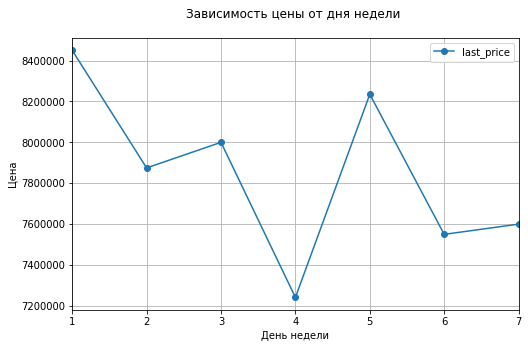

In [67]:
(city_SP_centre.pivot_table(index='weekday', values='last_price',aggfunc='median')
                .plot(figsize=(8,5),grid=True, style='o-'))
plt.title('Зависимость цены от дня недели \n')
plt.xlabel('День недели')
plt.ylabel('Цена')

    Здесь цена более волатильна, чем в общей базе данных. И размах шире и динамика другая. Разница между крайними значениями составляет 1,2 млн.рублей, это 16%.

    Рассмотрим влияние цены от месяца размещения объявления.

Text(0, 0.5, 'Цена')

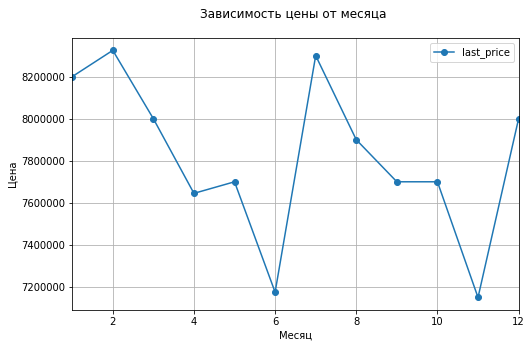

In [68]:
(city_SP_centre.pivot_table(index='month', values='last_price',aggfunc='median')
                .plot(figsize=(8,5),grid=True, style='o-'))
plt.title('Зависимость цены от месяца \n')
plt.xlabel('Месяц')
plt.ylabel('Цена')

    Очень динамичный график. Продавать лучше в феврале и июле, а покупать в июне и ноябре. Разница между крайними значениями составляет 1,6 млн. рублей или 22%.

Посмотрим на зависимость цены от года подачи объявления.

Text(0, 0.5, 'Цена')

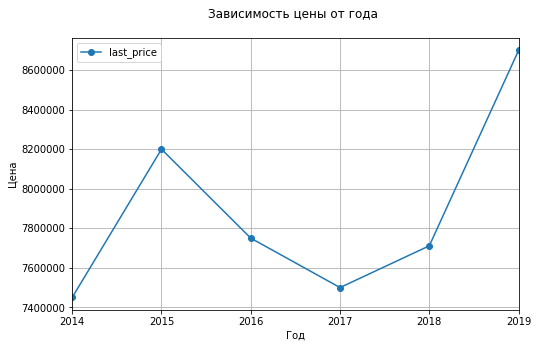

In [69]:
(city_SP_centre.pivot_table(index='year', values='last_price',aggfunc='median')
         .plot(figsize=(8,5),grid=True, style='o-'))
plt.title('Зависимость цены от года \n')
plt.xlabel('Год')
plt.ylabel('Цена')

    Здесь динамика другая, чем в общей базе недвижимости. Вместо спада к 2015 году, здест мы видем подъем. Далее идет спад как и на общем графике, а далее резкий подъем в 2019 году.

### Общий вывод

При предобработке данных мы убрали пустые значения в некоторых столбцах, 
удалили данные, которые могли снизить точность нашего анализа. Посчитали и ввели новые данные необходимые в нашем исследовании. Поменяли тип данных для удобства работы.

Провели исследовательский анализ. Выясняли, что в представленном датафрейме преобладают квартиры от 30 до 125 кв. метров, а цены от 1 до 15 млн. рублей. В основном представлены 1, 2-х и 3-х комнатные квартиры.
Изучили время продажи квартиры и выяснили, что среднее время продажи составляет 181 день, а медианное значение 95 дней. Продажу более 500 дней можно считать очень долгой.

Подчистили таблицу, убрав редкие значения и изучили факторы влияющие на стоимость квартиры. Основным факторами влияющими на стоимость является общая площадь квартиры. Количество комнат не сильно влияет на цену, а от расстояния от центра цена квартиры почти независит. Свою лепту вносит расположение квартиры на этаже. Квартиры на 1 и последнем этажах стоят дешевле. Интересная связь между ценой и днем недели подачи объявления. Во вторник средняя цена продажи на 7% выше. Так же цена зависит и от месяца подачи объявления. В апреле она выше на 4,5%, а в июне ниже на 4,5%. Год подачи объявления тоже влияет на цену.

Выбрали 10 населенных пунктов наибольшим числом объявлений и посчитали среднюю цену за квадратный метр. Оказалось, что средняя цена за квадрат  в Сестрорецке и Пушкине всего на 10000 ниже чем в Санкт-Петербурге.

Изучили предложения квартир в центре Санкт-Петербурге, определив центральную зону в 5 км. Больше всего 2-х и 3-х комнатных квартир с общей площадью от 40 до 100 м.кв., с ценой от 5 до 10 млн. Высота потолков в центре города выше, чем по все базе и составляет 3 метра.
Факторы влияющие на цену квартиры в центре остаются те же, что и для общей базы, но с чуть меньшим значением. Но в остальном у центра Санкт-Петербурга свои особенности. Квартиры на последнем этаже здесь стоят дороже всего и цена квартиры в зависимости от дня недели более волатильна. Так же другой график зависимости цены от месяца подачи объявления, с пиками в феврале и июле и провалами в июне и ноябре. График зависимости цены квартиры от года подачи объявления тоже носит другой характер.